**Set up and configure the API to accept image prompts.**

**Installing the Gemini SDK**

To interact with the Gemini API using Python, we'll utilize the official Gemini SDK for Python, which streamlines the process of integrating the API into our Python applications.

In [1]:
!pip install -U -q google-genai

**Getting and setting up the api key**

To use the Gemini API, you'll need an API key. If you don't have one, create a key in Google AI Studio and copy it.

In Colab, paste the key into the secrets section under the "🔑" icon in the left panel, or you can import it directly from the studio.

**Fetching API key**

In [1]:
from google.colab import userdata

# Store the key in the variable 'GEMINI_API_KEY'
GEMINI_API_KEY: str = userdata.get('GOOGLE_API_KEY')

# Check if key was sucessfully fetched
if GEMINI_API_KEY:
  print(" API key fetched sucessfully ")
else:
  print("API key not found. Please set the 'GEMINI_API_KEY.")

 API key fetched sucessfully 


**Configuring the Gemini SDK**

In [2]:
# Import the genai module for API interaction
import google.generativeai as genai

# Configure it with your API key
genai.configure(api_key=GEMINI_API_KEY)


In [7]:
# Check all available methods in the genai module

dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

**Get all available models from gemini**

In [8]:
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

**Select and configure model (in my case i will select  'gemini-1.5-flash' due to it's low cost and excellent performance)**

In [10]:
from google.generativeai.generative_models import GenerativeModel

model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

**List all available methods for the model**

In [11]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_async_client',
 '_client',
 '_generation_config',
 '_get_tools_lib',
 '_model_name',
 '_prepare_request',
 '_safety_settings',
 '_system_instruction',
 '_tool_config',
 '_tools',
 'cached_content',
 'count_tokens',
 'count_tokens_async',
 'from_cached_content',
 'generate_content',
 'generate_content_async',
 'model_name',
 'start_chat']

**Here we shall use generate_content method to generate responses.**

In [14]:
# Import the `GenerateContentResponse` class from Google's Generative AI library.

from google.generativeai.types.generation_types import GenerateContentResponse
# This class is used to type hint the response object returned by the `generate_content` method.

response: GenerateContentResponse = model.generate_content(
    "What is generative ai and it's applications. Respond in Markdown format."
)

print(response.text)

# Generative AI: Creating New Content

Generative AI is a type of artificial intelligence that can create new content, rather than just analyzing or classifying existing data.  It learns patterns from input data (text, images, audio, etc.) and then uses this learned knowledge to generate similar but novel outputs.  Unlike traditional AI which focuses on prediction or classification, generative AI focuses on *generation*.

**Key Mechanisms:**  Generative AI relies heavily on techniques like:

* **Generative Adversarial Networks (GANs):** Two neural networks compete against each other – a generator creating content and a discriminator evaluating its authenticity.  This adversarial process improves the quality of generated content over time.
* **Variational Autoencoders (VAEs):**  These learn a compressed representation of the input data and then use this representation to generate new data points similar to the original.
* **Large Language Models (LLMs):**  These models, often based on t

**Render Markdown content in the notebook output**

In [15]:
# Import the Markdown class from the IPython.display module

from IPython.display import Markdown

display(Markdown(response.text))

# Generative AI: Creating New Content

Generative AI is a type of artificial intelligence that can create new content, rather than just analyzing or classifying existing data.  It learns patterns from input data (text, images, audio, etc.) and then uses this learned knowledge to generate similar but novel outputs.  Unlike traditional AI which focuses on prediction or classification, generative AI focuses on *generation*.

**Key Mechanisms:**  Generative AI relies heavily on techniques like:

* **Generative Adversarial Networks (GANs):** Two neural networks compete against each other – a generator creating content and a discriminator evaluating its authenticity.  This adversarial process improves the quality of generated content over time.
* **Variational Autoencoders (VAEs):**  These learn a compressed representation of the input data and then use this representation to generate new data points similar to the original.
* **Large Language Models (LLMs):**  These models, often based on transformer architectures, process vast amounts of text data and can generate human-quality text, translate languages, write different kinds of creative content, and answer your questions in an informative way.  Examples include GPT-3, LaMDA, and others.
* **Diffusion Models:** These models gradually add noise to data and then learn to reverse the process, generating new data points from pure noise.


**Applications of Generative AI:**

Generative AI's capabilities have opened up a wide range of applications across various fields:

* **Text Generation:**  Writing articles, summaries, scripts, poems, code, email responses, and more.
* **Image Generation:** Creating realistic or stylized images from text descriptions (text-to-image), enhancing images, generating variations of existing images, and creating entirely new visual concepts.
* **Audio Generation:** Composing music, creating sound effects, generating realistic speech, and enhancing audio quality.
* **Video Generation:**  Creating short video clips, animating characters, and generating realistic video content.
* **Drug Discovery:** Designing new molecules with desired properties.
* **Material Science:** Discovering new materials with specific characteristics.
* **Art and Design:** Creating unique artwork, designing products, and generating new artistic styles.
* **Game Development:** Generating game assets, levels, and storylines.
* **Personalized Experiences:** Tailoring content and experiences to individual users.
* **Customer Service:**  Generating automated responses to customer inquiries.


**Challenges and Ethical Considerations:**

While powerful, generative AI also presents challenges:

* **Bias and Fairness:**  Models trained on biased data can perpetuate and amplify existing societal biases.
* **Misinformation and Deepfakes:**  The ability to generate realistic but false content poses significant risks.
* **Copyright and Intellectual Property:**  The ownership and legal implications of AI-generated content are still being debated.
* **Job displacement:** Automation of creative tasks could lead to job losses in some sectors.


Despite these challenges, generative AI is rapidly evolving and its potential to transform various industries is immense.  Ongoing research and responsible development are crucial to mitigate risks and harness its benefits ethically and effectively.


**Use image in the prompt**

In [18]:
from google.colab import files

# Use the upload function to open a file upload dialog
uploaded = files.upload()

# Access the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes.')


Saving Jet Pack Drawing.jfif to Jet Pack Drawing.jfif
Uploaded file "Jet Pack Drawing.jfif" with length 60900 bytes.


**Display the downloaded image**

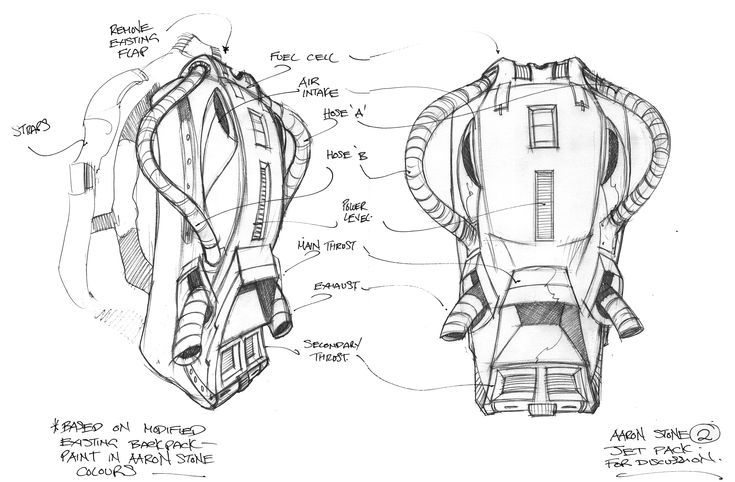

In [19]:
import PIL.Image
img = PIL.Image.open('Jet Pack Drawing.jfif')
display(img)

**Write a prompt and store it into some variable**

In [21]:
prompt = """The image shows a sketch of a potential product accompanied by notes.
Based on the product sketch, provide a detailed description of the product, ensuring all features are noted.
Return the output in JSON format:
{description: "description", features: ["feature1", "feature2", "feature3", etc.]}"""

response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)

```json
{
  "description": "This sketch depicts a jetpack design, based on a modified existing backpack. It's designed to be painted in Aaron Stone colors.  The jetpack features a fuel cell, air intake, two hoses (labeled A and B), a power level indicator, a main thruster, a secondary thruster, and exhaust ports.  The design includes straps for the user and a removable existing flap.",
  "features": [
    "Fuel Cell",
    "Air Intake",
    "Hose A",
    "Hose B",
    "Power Level Indicator",
    "Main Thruster",
    "Secondary Thruster",
    "Exhaust Ports",
    "Straps",
    "Removable Existing Flap",
    "Aaron Stone Color Scheme"
  ]
}
```

